## Question 1
### 1 (a)

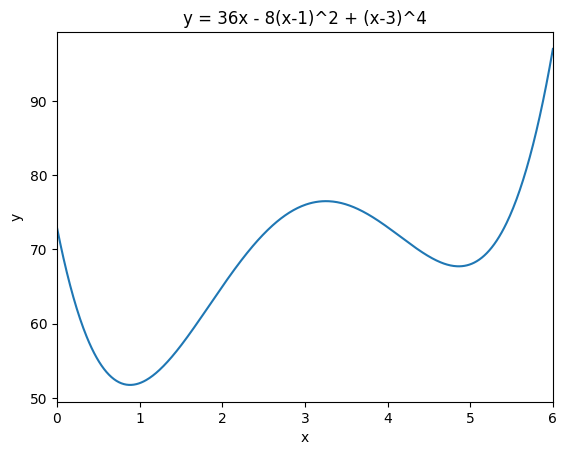

In [12]:
import matplotlib.pyplot as plt 

def func(x): 
  return 36*x - 8*(x-1)**2 + (x-3)**4

x_range = [i/100 for i in range(0, 601)]
y_values = [func(x) for x in x_range]

plt.plot(x_range, y_values)
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = 36x - 8(x-1)^2 + (x-3)^4')
plt.xlim([0, 6])
plt.show()


### 1 (b)
Answer: From looking at the graph above we can see that there are two local minimas. GD is sensitive to the starting point.
- If it starts between 0 <= x < 3, which is the left side of the local maximum, it will likely converge to one minimum.
- If it starts after x > 4, which is the right side of the local maximum, it will converge to the other minimum.

### 1(c)
The first local minima has the lowest y<sup>*</sup> making it the global minima, so I would accept (0.8851, 51.7639).

In [13]:
def GD(x, alpha=0.01, tol=1e-6, max_iters=10000):
  for _ in range(max_iters):
    df_dx = 36 - 16*(x - 1) + 4*(x - 3)**3
    x_new = x - alpha * df_dx
    if abs(x_new - x) < tol:
      break
    x = x_new
  return x, func(x)

x1_star, y1_star = GD(1)
x2_star, y2_star = GD(6)

print(f"First local minimum: x1* = {x1_star:.4f}, y1* = {y1_star:.4f}")
print(f"Second local minimum: x2* = {x2_star:.4f}, y2* = {y2_star:.4f}")


First local minimum: x1* = 0.8851, y1* = 51.7639
Second local minimum: x2* = 4.8608, y2* = 67.7320


### 1(d)

From the plot there is a local maximum between x = 3 and x = 4, call it x<sub>max</sub>.  
- If GD starts from x < x<sub>max</sub> that is (1, x<sub>max</sub>), it converges to (x<sub>1</sub><sup>\*</sup>, y<sub>1</sub><sup>\*</sup>) -> (0.8851, 51.7639).
- If GD starts from x > x<sub>max</sub> that is (x<sub>max</sub>, 6), it converges to (x<sub>2</sub><sup>\*</sup>, y<sub>2</sub><sup>\*</sup>) -> (4.8608, 67.7320).

The mathematical approach would involve solving solving df(x) = 0:

36 - 16(x - 1) + 4(x - 3)<sup>3</sup> = 0

Therefore solving this x<sub>max</sub> = 3.2541

## Question 2

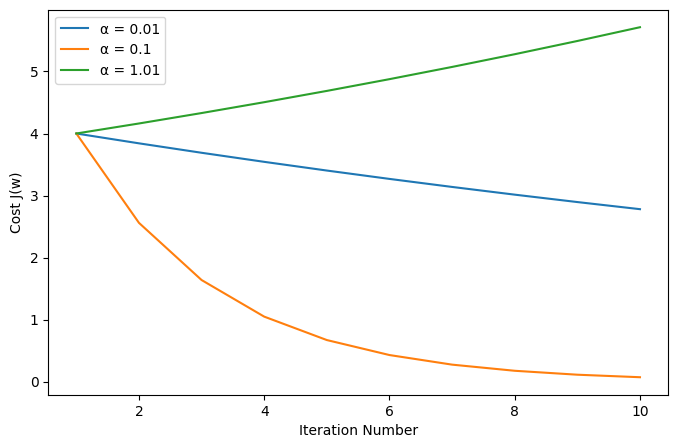

In [18]:
def J(w):
  return (w - 2)**2

def GD(alpha, w0=0, iterations=10):
    w = w0
    cost_values = []
    
    for _ in range(iterations):
      cost_values.append(J(w))
      w = w - alpha * (2 * (w - 2))
    
    return cost_values

learning_rates = [0.01, 0.1, 1.01]
iterations = 10

plt.figure(figsize=(8, 5))
for alpha in learning_rates:
  costs = GD(alpha)
  plt.plot(range(1, iterations + 1), costs, label=f'α = {alpha}')

plt.xlabel("Iteration Number")
plt.ylabel("Cost J(w)")
plt.legend()
plt.show()

- α = 0.01, the learning rate is small, leading to slow convergence.
- α = 0.1, best option as cost values decrease rapidly.
- α = 1.01, this learning rate is too large, actually leading to divergence.

## Question 3

In [19]:
import numpy as np
data = np.load("arrays_2.npz")

In [20]:
# Extract arrays using the keys used during saving (x_train, y_train, x_test, y_test)
x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

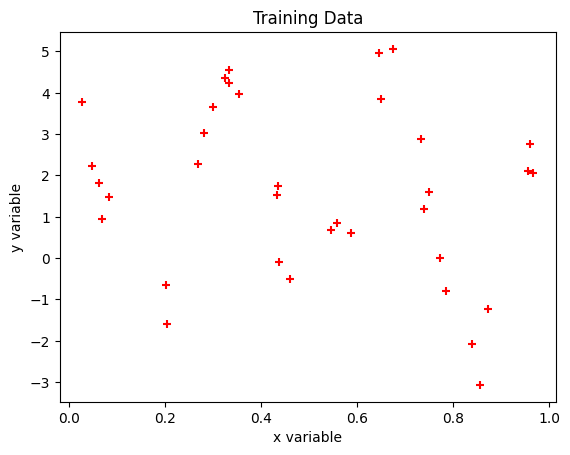

In [21]:
# Plot the traing data points
plt.scatter(x_train, y_train, marker='+', c='r')
# Set the title
plt.title("Training Data")
# Set the y-axis label
plt.ylabel('y variable')
# Set the x-axis label
plt.xlabel('x variable')
plt.show()

In [22]:
def f_j(x, j):
  return np.cos(2 * j* np.pi * x)

In [23]:
def f_cosine(x,w):
  n = len(w)-1
  my_sum=0
  for j in range(0,n+1):
    my_sum+=w[j]*f_j(x,j)
  return my_sum

In [24]:
def compute_cost(x, y, w):
  m = len(x)
  n = len(w)-1


  # computation for the model's predictions
  f_w_n = f_cosine(x,w)

  # Vectorized computation for the cost
  total_cost = 1 / (2 * m) * np.sum((f_w_n - y) ** 2)

  return total_cost

In [27]:
def compute_gradient(x, y, w):
  m = len(x)
  n = len(w)-1

  y_hat = f_cosine(x,w)
  error = y_hat - y

  dj_dw=np.zeros(n+1)

  for j in range(n+1):
    dj_dw[j] = np.sum(error*f_j(x, j)) / m

  return dj_dw

In [28]:
def my_model_fit(x_train, y_train,n):
  """
  uses gradient descent to fit the model to training data
  Args:
  """
  m = len(x_train)
  alpha=.01
  w_hat=np.zeros(n+1)
  d=10

  max_iteration_count=5000
  iteration_number=0

  while (d>.001) or (iteration_number< max_iteration_count):
    dj_dw=compute_gradient(x_train, y_train, w_hat)
    d=np.max(np.abs(dj_dw))
    w_hat=w_hat-alpha*dj_dw
    iteration_number+=1

  return w_hat

In [30]:
training_errors=[]
test_errors=[]
n_values=range(0,7)

for n in n_values:
  w_hat=my_model_fit(x_train, y_train,n)
  training_errors.append(compute_cost(x_train, y_train, w_hat))
  test_errors.append(compute_cost(x_test, y_test, w_hat))

rounded_training_errors=[round(x, 3) for x in training_errors]
rounded_test_errors=[round(x, 3) for x in test_errors]
print('training_errors=',rounded_training_errors)
print('test_errors=', rounded_test_errors)

training_errors= [np.float64(2.139), np.float64(2.047), np.float64(2.046), np.float64(0.154), np.float64(0.15), np.float64(0.147), np.float64(0.146)]
test_errors= [np.float64(3.355), np.float64(3.316), np.float64(3.288), np.float64(0.251), np.float64(0.287), np.float64(0.315), np.float64(0.33)]


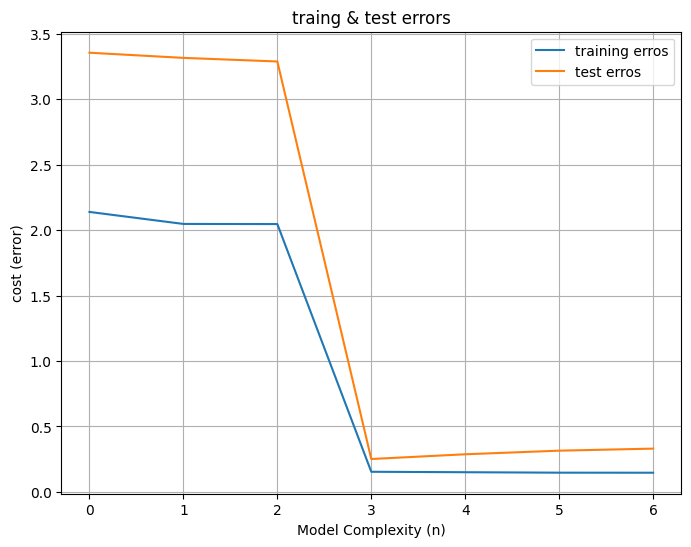

In [31]:
plt.figure(figsize=(8, 6))
plt.plot(n_values, training_errors, label="training erros")
plt.title("traing & test errors")
plt.xlabel("Model Complexity (n)")
plt.ylabel("cost (error)")
plt.grid(True)
plt.plot(n_values, test_errors, label="test erros")
plt.legend()
plt.show()

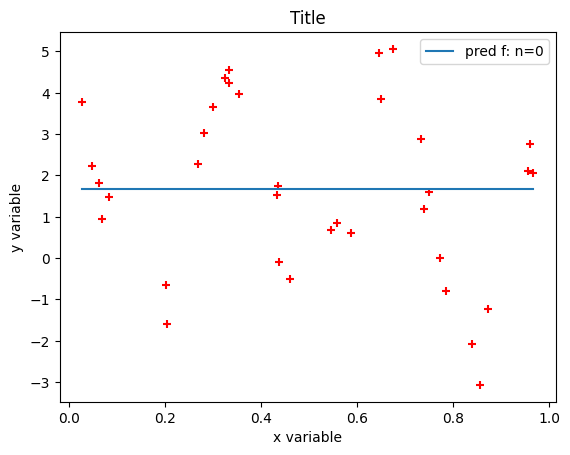

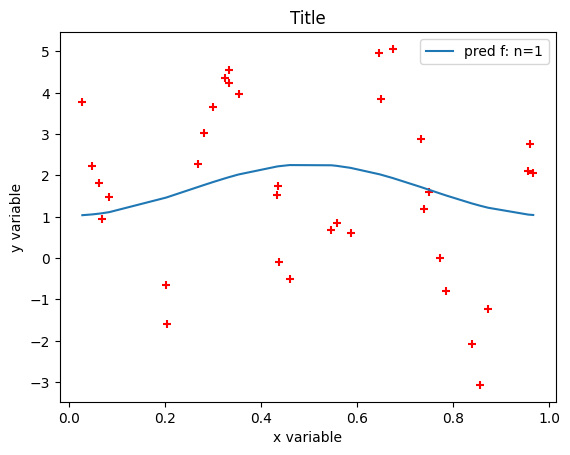

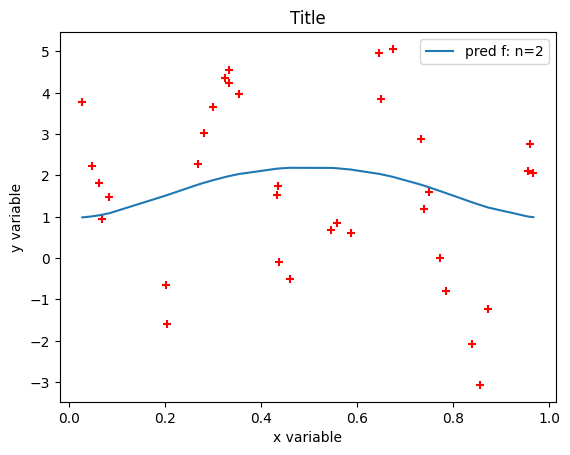

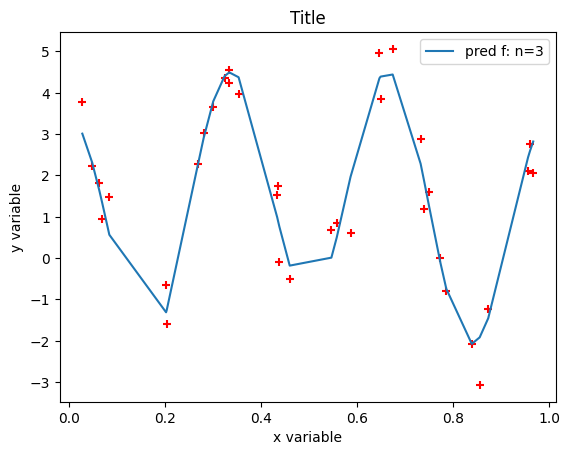

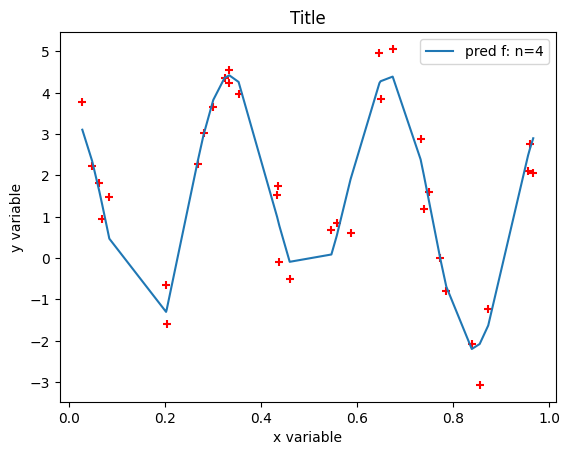

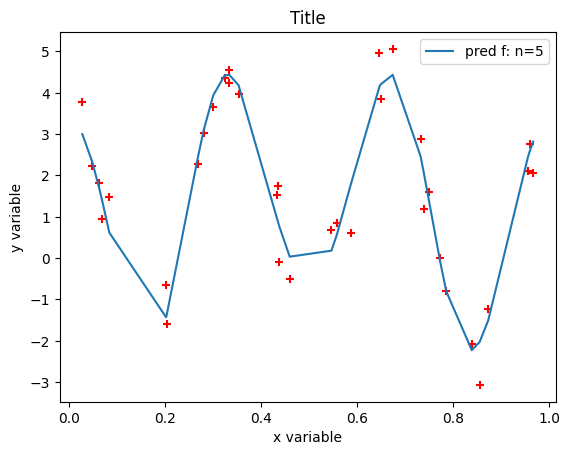

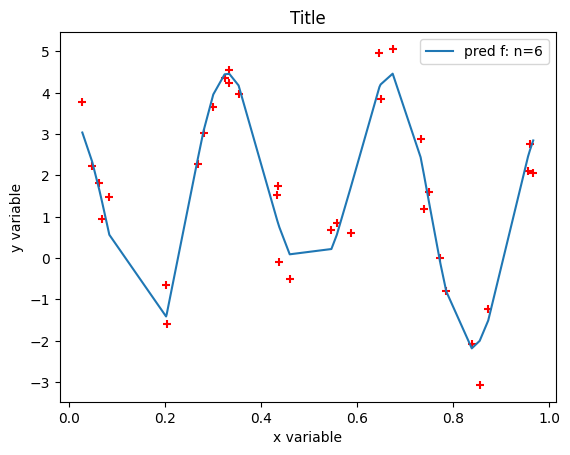

In [32]:
n_values=range(0,7)
x_sorted=np.sort(x_train)

for n in n_values:
  w_hat=my_model_fit(x_train, y_train,n)
  #plot
  plt.scatter(x_train, y_train, marker='+', c='r')
  y_pred=f_cosine(x_sorted,w_hat)
  plt.plot(x_sorted, y_pred, label=f"pred f: n={n}")
  # Set the title
  plt.title("Title")
  # Set the y-axis label
  plt.ylabel('y variable')
  # Set the x-axis label
  plt.xlabel('x variable')
  plt.legend()
  plt.show()

In [33]:
def compute_reg_gradient(x, y, w, lambda_reg):
  m = len(x)
  n = len(w)-1

  y_hat = f_cosine(x,w)
  error = y_hat - y
  dj_dw=np.zeros(n+1)

  for j in range(n+1):
    dj_dw[j] = np.sum(error*f_j(x, j)) / m+lambda_reg/m*w[j]


  return dj_dw

In [34]:
def my_model_reg_fit(x_train, y_train,n, lambda_reg):
  """
  uses gradient descent to fit the model to training data
  Args:
  """
  m = len(x_train)
  alpha=.01
  w_hat=np.zeros(n+1)
  d=10

  max_iteration_count=5000
  iteration_number=0

  while (d>.001) or (iteration_number< max_iteration_count):
    dj_dw=compute_reg_gradient(x_train, y_train, w_hat,lambda_reg)
    d=np.max(np.abs(dj_dw))
    w_hat=w_hat-alpha*dj_dw
    iteration_number+=1

  return w_hat

In [35]:
n=6
lambda_reg=0.1
w_hat=my_model_reg_fit(x_train, y_train,n,lambda_reg)
training_error_reg=compute_cost(x_train, y_train, w_hat)
test_error_reg=compute_cost(x_test, y_test, w_hat)

print('w_values=',w_hat)
print('training_error_reg=',training_error_reg)
print('test_error_reg=', test_error_reg)

w_values= [ 1.20495831 -0.76197356  0.04219373  2.82667504  0.19752578 -0.18437192
  0.05956103]
training_error_reg= 0.14640746752317396
test_error_reg= 0.3359238882581078
